In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

## Kernel: Replace the dot product of data points, np.dot(X.T,X), with another function so that it is equivalent to projecting the data points to a higher dimension space (through nonlinear transformation). In such way, we can deal with nonlinear problem.
### kernel -> measure the similarity between 2 points

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # create a meshgrid
    # find the coordinates for all the points with the region (x_min,x_max)(y_min, y_max)
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    # clf classifier
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

def myPlot(clf, xx, yy, X0, X1, title):
    plot_contours(clf, xx, yy, 
                  cmap=plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

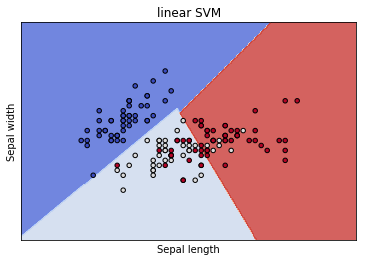

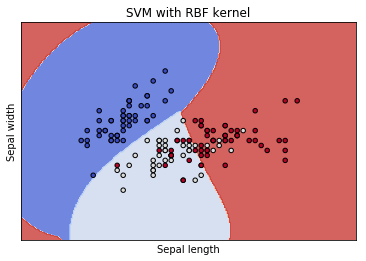

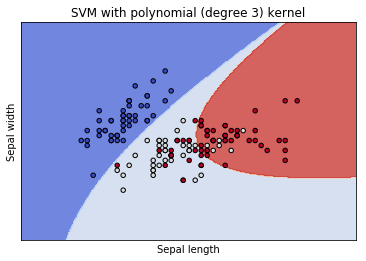

In [4]:
iris = datasets.load_iris()
# Take the first two features, we could avoid this by using a two-dim dataset
X = iris.data[:,:2]
y = iris.target

C = 1 # SVM regularization parameter
svm_linear = svm.SVC(kernel='linear',C=C).fit(X,y)
svm_rbf = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,y)
svm_poly = svm.SVC(kernel='poly',degree=3,C=C).fit(X,y)

# title for the plots
titles = {'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel'}

X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0,X1)

myPlot(svm_linear,xx,yy,X0,X1,"linear SVM")
myPlot(svm_rbf,xx,yy,X0,X1,"SVM with RBF kernel")
myPlot(svm_poly,xx,yy,X0,X1,"SVM with polynomial (degree 3) kernel")

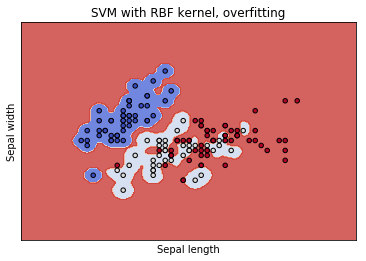

In [11]:
svm_rbf = svm.SVC(kernel='rbf', gamma=100, C=100).fit(X,y)
myPlot(svm_rbf,xx,yy,X0,X1,"SVM with RBF kernel, overfitting")
# gamma值大的时候 x和x的值近一点远一点 整个值都很大，即每个点只能影响其周围很小的范围
# 点和点之间的影响就越多？
# 

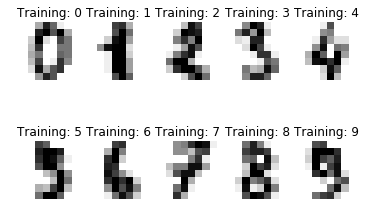

In [24]:
# Using SVM to do image recognition
from sklearn import datasets, svm, metrics

# the digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Training: %i' % label)

In [25]:
# training and prediction

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print n_samples
print data[:2]

1797
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]]


In [26]:
X = data/16.
Y = digits.target

In [27]:
from sklearn.model_selection import GridSearchCV
# cross-validation, find best classifier
Cs = np.logspace(-6,-1,10)
kernels = ['linear','rbf','poly']
degrees = [2,3,4]
gammas = [0.001,0.01,0.1,1,2,5]
modelCV = GridSearchCV(estimator=svm.SVC(),
                    param_grid=dict(C=Cs,kernel=kernels,degree=degrees,gamma=gammas),
                      n_jobs=-1)
modelCV.fit(X[:n_samples // 2], Y[:n_samples // 2])

classifier = modelCV.best_estimator_
print(classifier)

SVC(C=0.0077426368268112772, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=2, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Classification report              precision    recall  f1-score   support

          0       0.97      0.99      0.98        88
          1       0.99      0.93      0.96        91
          2       1.00      0.98      0.99        86
          3       0.96      0.90      0.93        91
          4       0.98      0.96      0.97        92
          5       0.92      0.97      0.94        91
          6       0.99      0.99      0.99        91
          7       0.97      0.98      0.97        89
          8       0.93      0.95      0.94        88
          9       0.89      0.93      0.91        92

avg / total       0.96      0.96      0.96       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 85  0  0  0  0  0  0  1  5]
 [ 1  0 84  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  1  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  2  0 87  0  0]
 [ 0  0  0  1  1  1  0  1 84  0]
 [ 2  0  0  1  0  2  0 

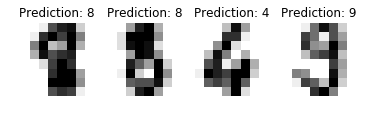

In [28]:
# Now predict the value of the digit on the second half:
# for test
expected = Y[n_samples // 2:]
predicted = classifier.predict(X[n_samples // 2:])

print("Classification report %s\n" % (metrics.classification_report(expected,predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected,predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()